In [1]:
# importing libraries

import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
import numpy as np
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.preprocessing import StandardScaler     # standard scaler
 
# CART model packages
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots

# new packages
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer

# new tools
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

# loading data
Got = pd.read_excel('./GOT_character_predictions.xlsx')

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
Got.head(n = 5)

S.No                  name                 title   culture  dateOfBirth              mother            father                heir           house               spouse  book1_A_Game_Of_Thrones  book2_A_Clash_Of_Kings  book3_A_Storm_Of_Swords  book4_A_Feast_For_Crows  book5_A_Dance_with_Dragons  isAliveMother  isAliveFather  isAliveHeir  isAliveSpouse  isMarried  isNoble   age  numDeadRelations  popularity  isAlive
0     1  Viserys II Targaryen                   NaN       NaN          NaN  Rhaenyra Targaryen  Daemon Targaryen  Aegon IV Targaryen             NaN                  NaN                        0                       0                        0                        0                           0            1.0            0.0          0.0            NaN          0        0   NaN                11    0.605351        0
1     2           Walder Frey  Lord of the Crossing  Rivermen        208.0                 NaN               NaN                 NaN      House Frey          Perra Royce                        1                       1                        1                        1                           1            NaN            NaN          NaN            1.0          1        1  97.0                 1    0.896321        1
2     3          Addison Hill                   Ser       NaN          NaN                 NaN               NaN                 NaN     House Swyft                  NaN                        0                       0                        0                        1                           0            NaN            NaN          NaN            NaN          0        1   NaN                 0    0.267559        1
3     4           Aemma Arryn                 Queen       NaN         82.0                 NaN               NaN                 NaN     House Arryn  Viserys I Targaryen                        0                       0                        0                        0                           0            NaN            NaN          NaN            0.0          1        1  23.0                 0    0.183946        0
4     5        Sylva Santagar            Greenstone   Dornish        276.0                 NaN               NaN                 NaN  House Santagar      Eldon Estermont                        0                       0                        0                        1                           0            NaN            NaN          NaN            1.0          1        1  29.0                 0    0.043478        1

In [2]:
# checking each feature for missing values
Got.isnull().sum(axis = 0)

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

In [3]:
# imputing missing values

# soft coding MEDIAN for feduc
age_median = Got['age'].median()


# filling cut NAs with MEDIAN
Got['age'].fillna(value = age_median,
                       inplace = True)


In [4]:
# soft coding MEDIAN for feduc
dateOfBirth_median = Got['age'].median()


# filling cut NAs with MEDIAN
Got['dateOfBirth'].fillna(value = dateOfBirth_median,
                       inplace = True)


In [5]:
Fill_col_unknown =['title', 'culture','mother','father', 'heir', 'house', 'spouse']

for col in Got[Fill_col_unknown]:
    if Got[col].isnull().astype(int).sum() > 0:
        Got[col] = Got[col].fillna('unknown')

In [6]:
Fill_col2 =['isAliveMother', 'isAliveFather','isAliveHeir','isAliveSpouse', 'isMarried', 'isNoble']

for col in Got[Fill_col2]:
    if Got[col].isnull().astype(int).sum() > 0:
        Got[col] = Got[col].fillna('-1')

In [7]:
# checking each feature for missing values
Got.isnull().sum(axis = 0)

S.No                          0
name                          0
title                         0
culture                       0
dateOfBirth                   0
mother                        0
father                        0
heir                          0
house                         0
spouse                        0
book1_A_Game_Of_Thrones       0
book2_A_Clash_Of_Kings        0
book3_A_Storm_Of_Swords       0
book4_A_Feast_For_Crows       0
book5_A_Dance_with_Dragons    0
isAliveMother                 0
isAliveFather                 0
isAliveHeir                   0
isAliveSpouse                 0
isMarried                     0
isNoble                       0
age                           0
numDeadRelations              0
popularity                    0
isAlive                       0
dtype: int64

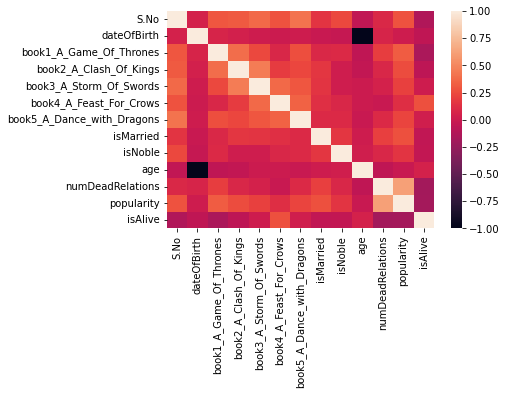

In [8]:
# linear (Pearson) correlation
Got_corr = Got.corr(method = 'pearson').round(decimals = 2)

# instantiating a heatmap
sns.heatmap(Got_corr)


# displaying the plot
plt.show()

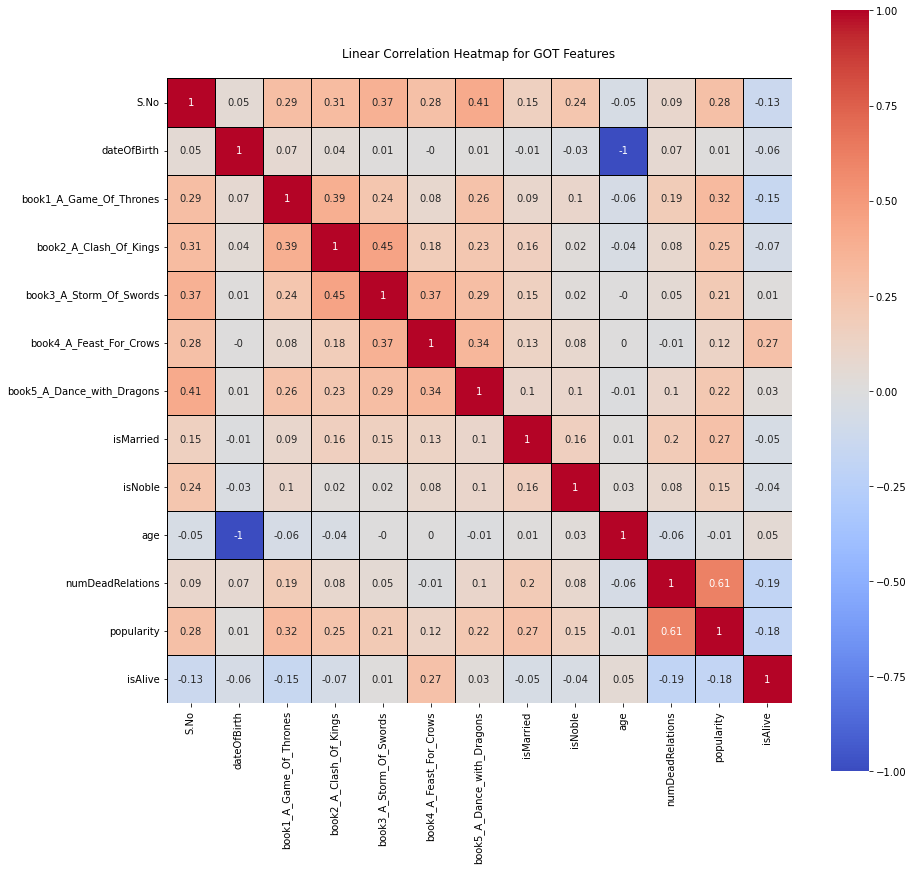

In [9]:
# Developing correlation heat map

# specifying plot size (making it bigger)
fig, ax = plt.subplots(figsize=(14,14))


# developing a coolwarm heatmap
sns.heatmap(data       = Got_corr, # the correlation matrix
            cmap       = 'coolwarm',    # changing to MEDIUM colors
            square     = True,          # tightening the layout
            annot      = True,          # should there be numbers in the heatmap
            linecolor  = 'black',       # lines between boxes
            linewidths = 0.5)           # how thick should the lines be?


# title and displaying the plot
plt.title("""
Linear Correlation Heatmap for GOT Features
""")

plt.show()

In [10]:
#import gender_guesser.detector as gender

# STEP 1: splitting names and surnames

# placeholder list
#placeholder_lst = []

# looping over each name 
#for index, col in Got.iterrows():
    
    # splitting name by space
    #split_name = Got.loc[index, 'name'].split(sep = ' ')
    
    # appending placeholder_lst with the results
    #placeholder_lst.append(split_name)
    

# converting placeholder_lst into a DataFrame 
#name_df = pd.DataFrame(placeholder_lst)


#renaming the columns 
#name_df.columns = ['name_1' , 'name_2', 'name_3','name_4', 'name_5', 'name_6']
#concatening the name 1 with the dataset

#Got = pd.concat([Got, name_df['name_1']],
#                     axis = 1)

# guessing gender based on (given) name

# placeholder list
#placeholder_lst = []


# looping to guess gender
#for name in Got['name_1']:
#    guess = gender.Detector().get_gender(name)
#    placeholder_lst.append(guess)


# converting list into a series
#Got['gender_guess'] = pd.Series(placeholder_lst)"""

In [11]:
# We are not using gender guess as it is not having significant impact in this model

In [12]:
Got.head(n = 5)

S.No                  name                 title   culture  dateOfBirth              mother            father                heir           house               spouse  book1_A_Game_Of_Thrones  book2_A_Clash_Of_Kings  book3_A_Storm_Of_Swords  book4_A_Feast_For_Crows  book5_A_Dance_with_Dragons isAliveMother isAliveFather isAliveHeir isAliveSpouse  isMarried  isNoble   age  numDeadRelations  popularity  isAlive
0     1  Viserys II Targaryen               unknown   unknown         27.0  Rhaenyra Targaryen  Daemon Targaryen  Aegon IV Targaryen         unknown              unknown                        0                       0                        0                        0                           0           1.0           0.0         0.0            -1          0        0  27.0                11    0.605351        0
1     2           Walder Frey  Lord of the Crossing  Rivermen        208.0             unknown           unknown             unknown      House Frey          Perra Royce                        1                       1                        1                        1                           1            -1            -1          -1           1.0          1        1  97.0                 1    0.896321        1
2     3          Addison Hill                   Ser   unknown         27.0             unknown           unknown             unknown     House Swyft              unknown                        0                       0                        0                        1                           0            -1            -1          -1            -1          0        1  27.0                 0    0.267559        1
3     4           Aemma Arryn                 Queen   unknown         82.0             unknown           unknown             unknown     House Arryn  Viserys I Targaryen                        0                       0                        0                        0                           0            -1            -1          -1           0.0          1        1  23.0                 0    0.183946        0
4     5        Sylva Santagar            Greenstone   Dornish        276.0             unknown           unknown             unknown  House Santagar      Eldon Estermont                        0                       0                        0                        1                           0            -1            -1          -1           1.0          1        1  29.0                 0    0.043478        1

In [13]:
# Get all of the culture values in our dataset
set(Got['culture'])

{'Andal',
 'Andals',
 'Asshai',
 "Asshai'i",
 'Astapor',
 'Astapori',
 'Braavos',
 'Braavosi',
 'Crannogmen',
 'Dorne',
 'Dornish',
 'Dornishmen',
 'Dothraki',
 'First Men',
 'Free Folk',
 'Free folk',
 'Ghiscari',
 'Ghiscaricari',
 'Ibbenese',
 'Ironborn',
 'Ironmen',
 'Lhazareen',
 'Lhazarene',
 'Lysene',
 'Lyseni',
 'Meereen',
 'Meereenese',
 'Myrish',
 'Naathi',
 'Northern mountain clans',
 'Northmen',
 'Norvos',
 'Norvoshi',
 'Pentoshi',
 'Qarth',
 'Qartheen',
 'Qohor',
 'Reach',
 'Reachmen',
 'Rhoynar',
 'Riverlands',
 'Rivermen',
 'Sistermen',
 'Stormlander',
 'Stormlands',
 'Summer Islander',
 'Summer Islands',
 'Summer Isles',
 'The Reach',
 'Tyroshi',
 'Vale',
 'Vale mountain clans',
 'Valemen',
 'Valyrian',
 'Westerlands',
 'Westerman',
 'Westermen',
 'Westeros',
 'Wildling',
 'Wildlings',
 'free folk',
 'ironborn',
 'northmen',
 'unknown',
 'westermen'}

In [14]:
# different names for one culture so lets group them up
cult = {'Andal' : ['Andal', 'Andals'],
        'Asshai' : ['Asshai', "Asshai'i"],
        'Astapor' : ['Astapor', 'Astapori' ],
        'Braavos' : ['Braavos', 'Braavosi' ],
        'Dornish': ['Dornishmen', 'Dorne', 'Dornish'],
        'Free Folk': ['First Men', 'Free Folk', 'Free folk'],
        'Ghiscari': ['Ghiscari', 'Ghiscaricari'],
        'Ironborn': ['Ironborn', 'Ironmen'],
        'Lhazareen' : ['Lhazareen', 'Lhazarene'],
        'Lysene': ['Lysene', 'Lyseni'],
        'Mereen': ['Meereen', 'Meereenese'],
        'Norvoshi': ['Norvos', 'Norvoshi'],
        'Northmen': ['the north', 'northmen', 'Northmen', 'Northern mountain clans'],
        'Qartheen': ['qartheen', 'qarth'],
        'Reach': ['reach', 'The Reach', 'Reachmen'],
        'RiverLands': ['Riverlands', 'Rivermen'],
        'Stormlander': ['Stormlands', 'Stormlander'],
        'Summer Islands': ['Summer Islands', 'Summer Islander', 'Summer Isles'],
        'Vale': ['Vale', 'Valemen', 'Vale mountain clans', 'Valyrian'],
        'Westermen': ['Westermen', 'Westerman', 'Westerlands', 'Westeros', 'westermen'],
        'Wildling': ['Wildling', 'Wildlings'],
        'others_culture' : ['Crannogmen', 'Dothraki', 'Ibbenese', 'Myrish', 'Naathi', 'Pentoshi',
                            'Qohor', 'Rhoynar', 'Sistermen', 'Tyroshi'   ]}

def get_cult(value):
    value = value.lower()
    v = [k for (k, v) in cult.items() if value in v]
    return v[0] if len(v) > 0 else value.title()
Got.loc[:, "culture"] = [get_cult(x) for x in Got["culture"]]

In [15]:
# one hot encoding variables
one_hot_culture       = pd.get_dummies(Got['culture'])



# joining codings together
Got = Got.join(other = [one_hot_culture])


# checking results
Got.columns

Index(['S.No', 'name', 'title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'Andal', 'Andals', 'Asshai', 'Asshai'I', 'Astapor', 'Astapori', 'Braavos', 'Braavosi', 'Crannogmen', 'Dorne', 'Dornish', 'Dornishmen', 'Dothraki', 'First Men', 'Free Folk', 'Ghiscari', 'Ghiscaricari', 'Ibbenese', 'Ironborn', 'Ironmen', 'Lhazareen', 'Lhazarene', 'Lysene', 'Lyseni', 'Meereen', 'Meereenese', 'Myrish', 'Naathi', 'Northern Mountain Clans', 'Northmen', 'Norvos', 'Norvoshi', 'Pentoshi', 'Qartheen', 'Qohor', 'Reach', 'Reachmen', 'Rhoynar', 'Riverlands', 'Rivermen', 'Sistermen', 'Stormlander', 'Stormlands', 'Summer Islander', 'Summer Islands', 'Summer Isles', 'The Reach', 'Tyroshi', 'Unknown',
       

User-Defined Functions to load the user-defined functions used throughout this notebook.

In [16]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.1,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

# Logistic Regression

a) Correlation Analysis

In [17]:
Got.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.75
0    0.25
Name: isAlive, dtype: float64

b) Preparing Explanatory and Response Data

In [18]:
# dropping variables after they've been encoded
Got = Got.drop(["S.No", "name","dateOfBirth", "mother", "father", "heir", "spouse",
                "isAliveMother", "isAliveFather", "isAliveHeir", "isAliveSpouse", "age",
               "Andal", "Andals", "Asshai", "Asshai'I", "Astapor", "Astapori", "Braavos", "Braavosi", "Crannogmen", "Dorne",
                "Dornish", "Dornishmen", "Dothraki", "First Men", "Free Folk", "Ghiscari", "Ghiscaricari", "Ibbenese", 
                "Ironborn", "Ironmen", "Lhazareen", "Lhazarene", "Lysene", "Lyseni", "Meereen", "Meereenese", "Myrish", 
                "Naathi", "Northern Mountain Clans", "Northmen", "Norvos", "Norvoshi", "Pentoshi", "Qartheen", "Qohor", "Reach", 
                "Reachmen", "Rhoynar", "Riverlands", "Rivermen", "Sistermen", "Stormlander", "Stormlands", "Summer Islander", 
                "Summer Islands", "Summer Isles", "The Reach", "Tyroshi", "Unknown", "Vale", "Vale Mountain Clans", "Valemen",
                "Westerlands", "Westerman", "Westermen", "Westeros", "Wildling", "Wildlings"], 
               axis = 1)

# checking the results
Got.columns

Index(['title', 'culture', 'house', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isMarried', 'isNoble', 'numDeadRelations', 'popularity', 'isAlive', 'Valyrian'], dtype='object')

In [19]:
df_corr = Got.corr(method = 'pearson').round(decimals = 2)

df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
book4_A_Feast_For_Crows       0.27
book5_A_Dance_with_Dragons    0.03
book3_A_Storm_Of_Swords       0.01
isNoble                      -0.04
isMarried                    -0.05
book2_A_Clash_Of_Kings       -0.07
book1_A_Game_Of_Thrones      -0.15
popularity                   -0.18
numDeadRelations             -0.19
Valyrian                     -0.21
Name: isAlive, dtype: float64

c) Prepare train-test split for statsmodels

In [20]:
# declaring explanatory variables
Got_data = Got.drop('isAlive', axis = 1)


# declaring response variable
Got_target = Got.loc[:, 'isAlive']

In [21]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            Got_data,
            Got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = Got_target) # preserving balance - to make sure sample size representative on both sides


# merging training data for statsmodels
Got_train = pd.concat([x_train, y_train], axis = 1)

In [22]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")





Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



In [23]:
for val in Got_data:
    print(f" {val} + ")

 title + 
 culture + 
 house + 
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons + 
 isMarried + 
 isNoble + 
 numDeadRelations + 
 popularity + 
 Valyrian + 


In [24]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula   = """isAlive ~ 
                                                    book4_A_Feast_For_Crows +
                                                    book5_A_Dance_with_Dragons    +
                                                    book3_A_Storm_Of_Swords       +
                                                    isNoble                      +
                                                    isMarried                    +
                                                    book2_A_Clash_Of_Kings       +
                                                    book1_A_Game_Of_Thrones      +
                                                    popularity                  +
                                                    numDeadRelations             +
                                                    Valyrian """,
                           data = Got_train)


# FITTING the model object
results_logistic = logistic_full.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.493808
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.129     
Dependent Variable:    isAlive             AIC:                 1751.3158 
Date:                  2021-12-19 16:54    BIC:                 1811.4632 
No. Observations:      1751                Log-Likelihood:      -864.66   
Df Model:              10                  LL-Null:             -992.53   
Df Residuals:          1740                LLR p-value:         3.3478e-49
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        6.0000                                             
--------------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
Intercept                   0.9542   0.1055  9.0484 0.0000  0.7475  1.1609
book4_A_Feast_For_Crows     1.5467   0.1493 10.3619 0.0000  1.2541  1.8393
book5_A_Dance_with_Dragons -0.0557   0.1412 -0.3947 0.6931 -0.3326  0.2211
book3_A_Storm_Of_Swords    -0.2913   0.1436 -2.0286 0.0425 -0.5728 -0.0099
isNoble                    -0.0559   0.1237 -0.4521 0.6512 -0.2984  0.1866
isMarried                  -0.0513   0.1864 -0.2754 0.7830 -0.4166  0.3140
book2_A_Clash_Of_Kings     -0.3714   0.1403 -2.6466 0.0081 -0.6464 -0.0964
book1_A_Game_Of_Thrones    -0.4713   0.1569 -3.0045 0.0027 -0.7788 -0.1639
popularity                 -1.3564   0.4499 -3.0149 0.0026 -2.2382 -0.4746
numDeadRelations           -0.1042   0.0526 -1.9803 0.0477 -0.2073 -0.0011
Valyrian                   -2.2370   0.4699 -4.7608 0.0000 -3.1579 -1.3161
==========================================================================

"""

In [25]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula   = """isAlive ~ 
                                                    book4_A_Feast_For_Crows +
                                                    
                                                    book3_A_Storm_Of_Swords       +
                                                                     +
                                                    book2_A_Clash_Of_Kings       +
                                                    book1_A_Game_Of_Thrones      +
                                                    popularity                  +
                                                    numDeadRelations             +
                                                    Valyrian """,
                           data = Got_train)


# FITTING the model object
results_logistic = logistic_full.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.493948
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.129     
Dependent Variable:   isAlive            AIC:                1745.8061 
Date:                 2021-12-19 16:54   BIC:                1789.5497 
No. Observations:     1751               Log-Likelihood:     -864.90   
Df Model:             7                  LL-Null:            -992.53   
Df Residuals:         1743               LLR p-value:        2.1009e-51
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                0.9253   0.0937  9.8764 0.0000  0.7417  1.1089
book4_A_Feast_For_Crows  1.5182   0.1402 10.8297 0.0000  1.2435  1.7930
book3_A_Storm_Of_Swords -0.2942   0.1432 -2.0543 0.0399 -0.5749 -0.0135
book2_A_Clash_Of_Kings  -0.3757   0.1395 -2.6936 0.0071 -0.6492 -0.1023
book1_A_Game_Of_Thrones -0.4813   0.1546 -3.1129 0.0019 -0.7843 -0.1782
popularity              -1.4150   0.4416 -3.2041 0.0014 -2.2806 -0.5494
numDeadRelations        -0.1045   0.0527 -1.9817 0.0475 -0.2078 -0.0011
Valyrian                -2.2735   0.4646 -4.8930 0.0000 -3.1842 -1.3628
=======================================================================

"""

e) Build a logistic regression model in statsmodels using all of the explanatory variables.

Logistic Regression in scikit-le

In [26]:
# explanatory sets from last session

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords',
                   'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isMarried'
                   'isNoble', 'numDeadRelations', 'popularity', 'Valyrian'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings',
                   'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows',
                    'numDeadRelations', 'popularity', 'Valyrian']

}

Dynamically print each explanatory variable set

In [27]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig_2']}


""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isMarriedisNoble', 'numDeadRelations', 'popularity', 'Valyrian']


Significant p-value Model:
--------------------------------
['book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'numDeadRelations', 'popularity', 'Valyrian']





Build a logistic regression model in scikit-learn

In [28]:
# train/test split with the full model
Got_data   =  Got.loc[ : , candidate_dict['logit_sig_2']]
Got_target =  Got.loc[ : , 'isAlive']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            Got_data,
            Got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = Got_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy

Training ACCURACY: 0.7727
Testing  ACCURACY: 0.8256


In [29]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 18  32]
 [  2 143]]


In [30]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 18
False Positives: 32
False Negatives: 2
True Positives : 143



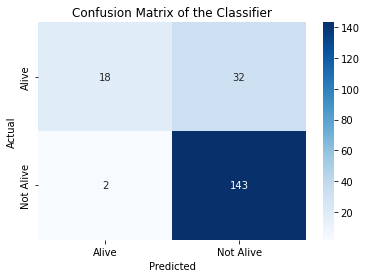

In [31]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Alive', 'Not Alive'])

In [32]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.6731


In [33]:
# zipping each feature name to its coefficient
logreg_model_values = zip(Got[candidate_dict['logit_sig_2']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', 0.91)
('book1_A_Game_Of_Thrones', -0.48)
('book2_A_Clash_Of_Kings', -0.37)
('book3_A_Storm_Of_Swords', -0.28)
('book4_A_Feast_For_Crows', 1.48)
('numDeadRelations', -0.12)
('popularity', -1.2)
('Valyrian', -1.91)


# Classification Trees (CART Models)

In [34]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [35]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.8812
Full Tree Testing ACCURACY : 0.7179
Full Tree AUC Score: 0.6334


Complete the code to unpack the confusion matrix

In [36]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 18
False Positives: 32
False Negatives: 2
True Positives : 143



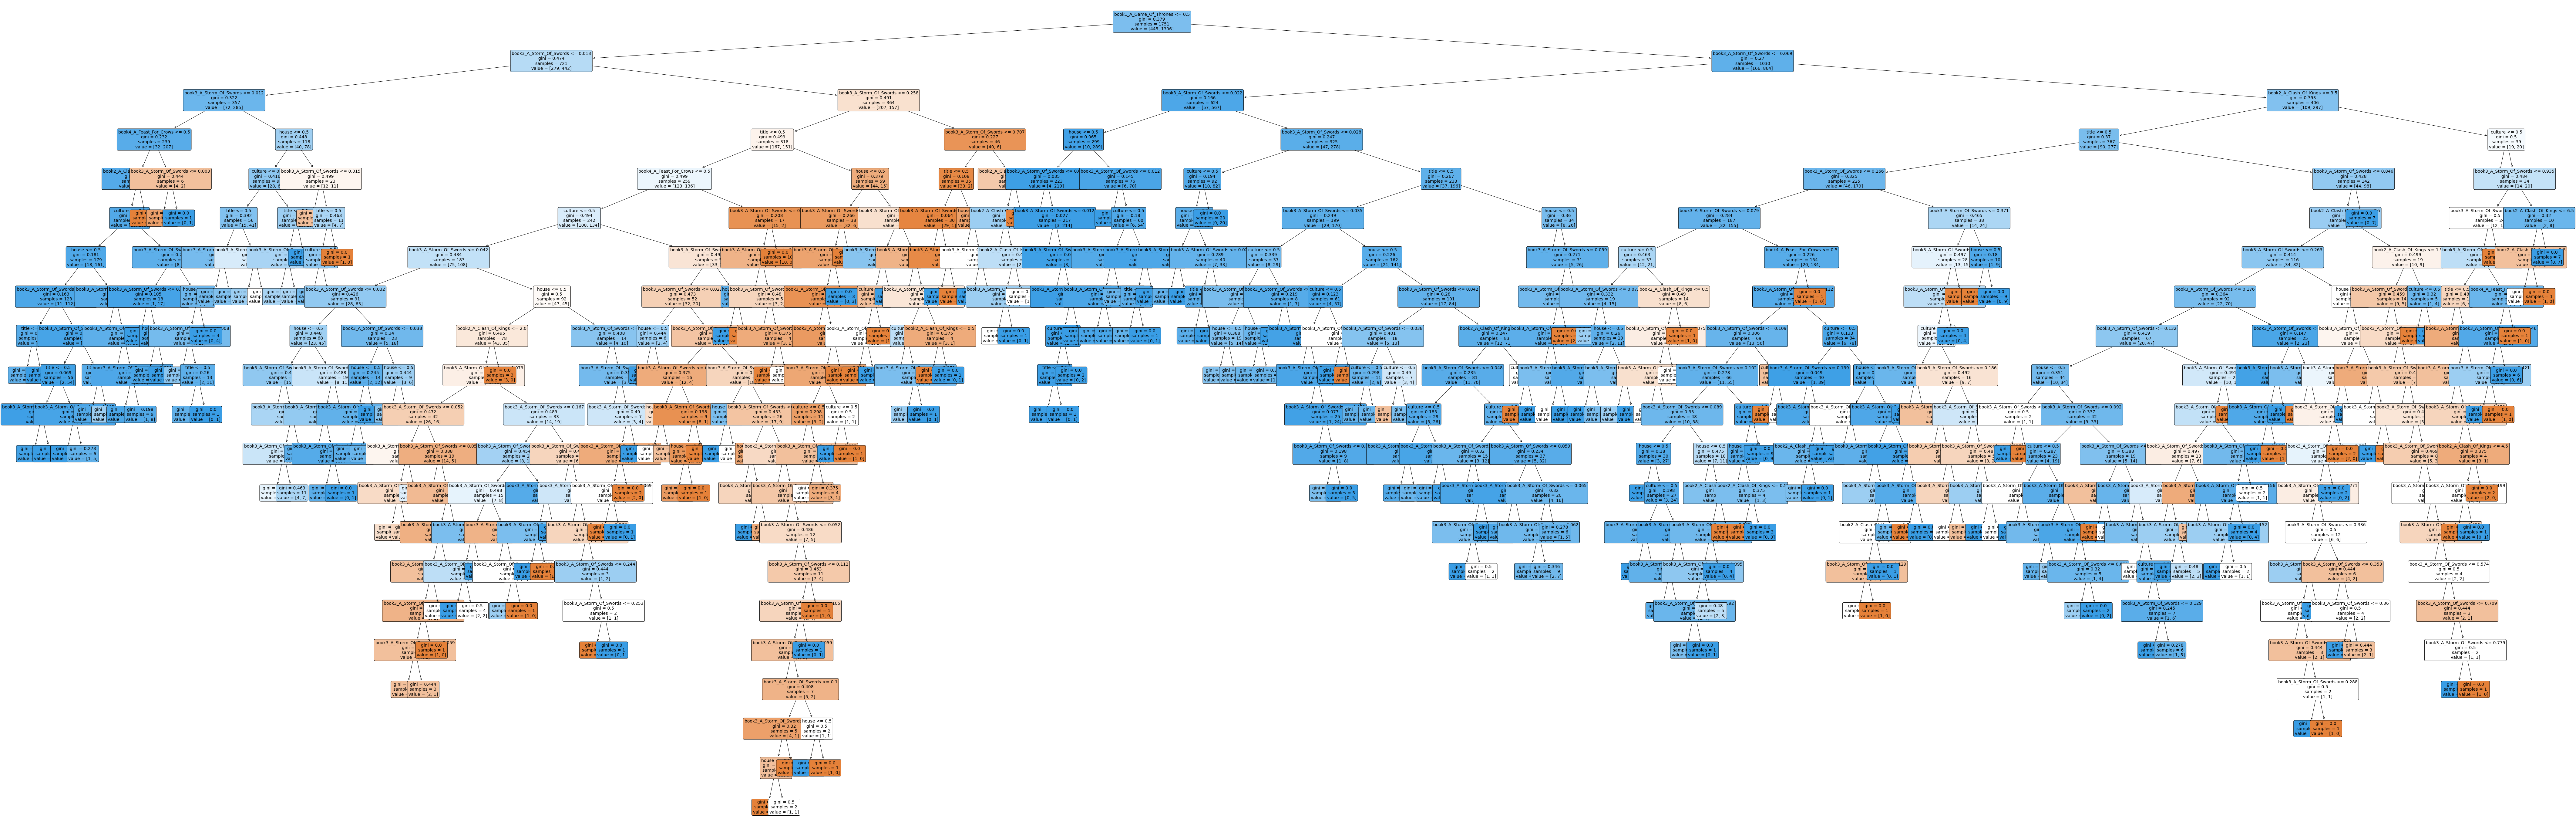

In [37]:
# setting figure size
plt.figure(figsize=(150,50))


# developing a plotted tree
plot_tree(decision_tree = full_tree_fit, 
          feature_names = Got.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

In [38]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 4,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.7818
Testing  ACCURACY: 0.8256
AUC Score        : 0.6666


In [39]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 18
False Positives: 32
False Negatives: 2
True Positives : 143



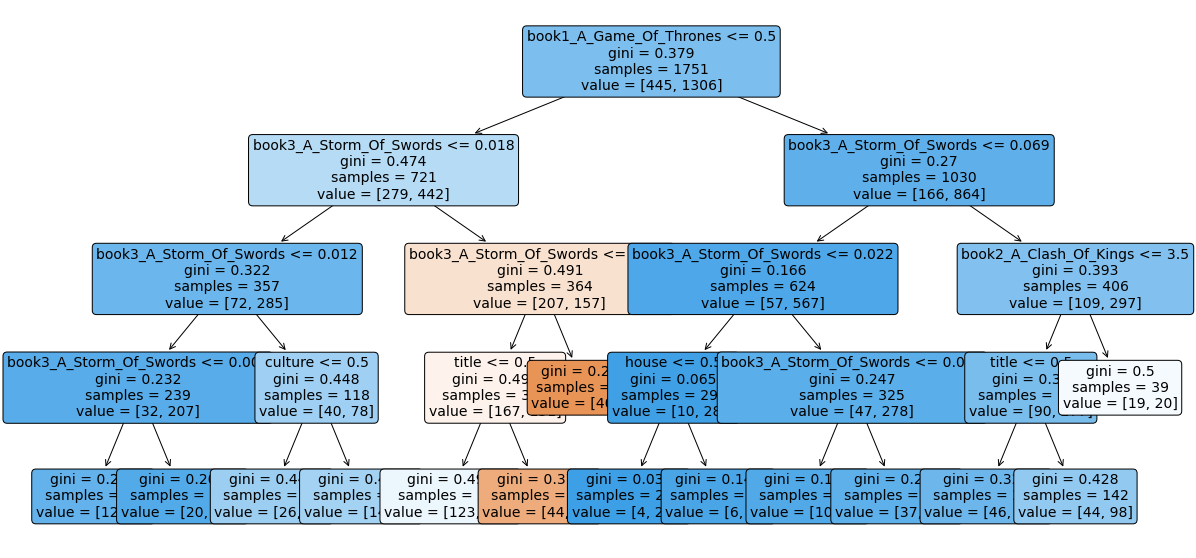

In [40]:
# setting figure size
plt.figure(figsize=(20, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = pruned_tree_fit, # changing to pruned_tree_fit
          feature_names = Got.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

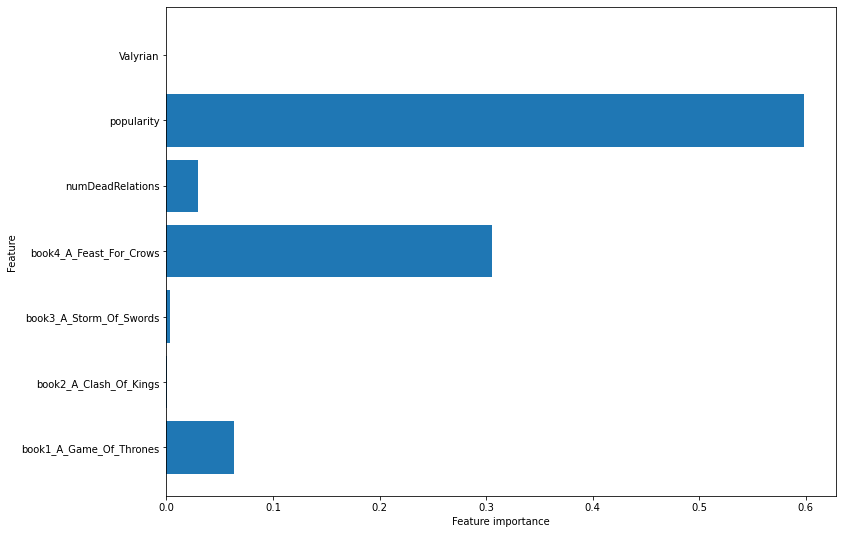

In [41]:
# plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train = x_train,
                         export = False)

d) Comparing Results


In [42]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}           {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)





Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6731         (18, 32, 2, 143)
Full Tree     0.6334           (18, 32, 2, 143)
Pruned Tree   0.6666         (18, 32, 2, 143)



In [43]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}           {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./path_practice/__results/classification_model_performance.xlsx',
                           index = False)


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6731         (18, 32, 2, 143)
Full Tree     0.6334           (18, 32, 2, 143)
Pruned Tree   0.6666         (18, 32, 2, 143)



# Classification Modeling with KNN

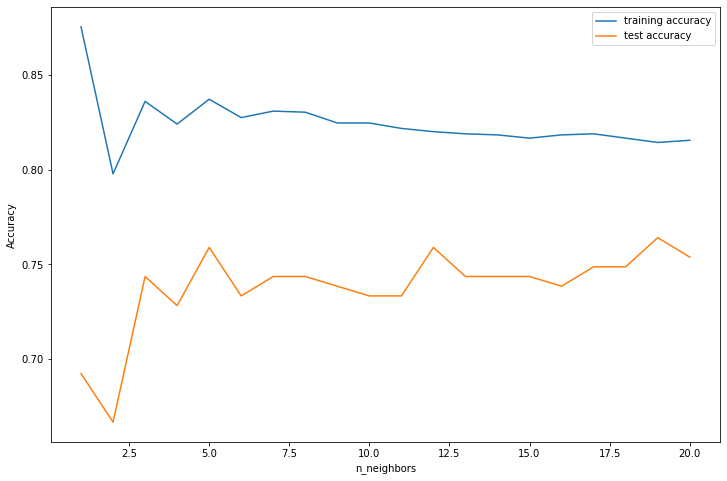

The optimal number of neighbors is: 19


In [44]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = Got_data,
                                  y_data        = Got_target,
                                  response_type = 'class')

In [45]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(Got_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(Got_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            Got_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = Got_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.807
Testing  ACCURACY: 0.8359
AUC Score        : 0.7259


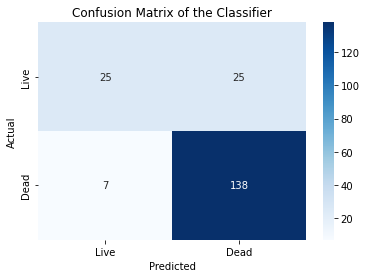

In [46]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = knn_pred,
          labels = ['Live', 'Dead'])

In [47]:
 # unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 18
False Positives: 32
False Negatives: 2
True Positives : 143



# Hyperparameter Tuning

In [48]:
# train/test split with the logit_sig variables
Got_data   =  Got.loc[ : , candidate_dict['logit_sig_2']]
Got_target =  Got.loc[ : , 'isAlive']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            Got_data,
            Got_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = Got_target)

In [49]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 219)

In [50]:
# FITTING the training data
lr_default_fit = lr_default.fit(x_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(x_test, y_test).round(4))


# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))


# saving scoring data for future use
logreg_train_score = lr_default_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = lr_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = lr_default_pred).round(4)

Training ACCURACY: 0.7727
Testing  ACCURACY: 0.8256
AUC Score        : 0.6731


# Hyperparameter Tuning with RandomizedSearchCV

In [51]:
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
C_range          = np.arange(0.1, 5.0, 0.1)
warm_start_range = [True, False]
solver_range     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
param_grid = {'C'          : C_range,
              'warm_start' : warm_start_range,
              'solver'     : solver_range}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 1000) # increased for convergence


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 250,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(Got_data, Got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

Tuned Parameters  : {'warm_start': False, 'solver': 'newton-cg', 'C': 1.8000000000000003}
Tuned CV AUC      : 0.5989


In [52]:
# checking the best estimator for the model
lr_tuned_cv.best_estimator_

LogisticRegression(C=1.8000000000000003, max_iter=1000, random_state=219,
                   solver='newton-cg')

In [53]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = LogisticRegression(C            = 1.8000000000000003,
                              warm_start   = True,
                              solver       = 'newton-cg',
                              max_iter     = 1000,
                              random_state = 219)


# FITTING the model to the full dataset
lr_tuned.fit(Got_data, Got_target) # this is ok because already tuned


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

LR Tuned Training ACCURACY: 0.7738
LR Tuned Testing  ACCURACY: 0.8205
LR Tuned AUC Score        : 0.6697


In [54]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 18
False Positives: 32
False Negatives: 3
True Positives : 142



In [55]:
# declaring model performance objects
lr_train_acc = lr_tuned.score(x_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(x_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned LR',
                           'Training Accuracy' : lr_train_acc,
                           'Testing Accuracy'  : lr_test_acc,
                           'AUC Score'         : lr_auc,
                           'Confusion Matrix'  : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp)},
                           ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy  Confusion Matrix
0     Logistic     0.6731             0.7727            0.8256  (18, 32, 2, 143)
1    Full Tree     0.6334             0.8812            0.7179  (18, 32, 2, 143)
2  Pruned Tree     0.6666             0.7818            0.8256  (18, 32, 2, 143)
3     Tuned LR     0.6697             0.7738            0.8205  (18, 32, 3, 142)

In [56]:
# declaring a hyperparameter space
criterion_range = ['gini', 'entropy']
splitter_range  = ['best', 'random']
depth_range     = np.arange(1, 25, 1)
leaf_range      = np.arange(1, 100, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_range,
              'splitter'         : splitter_range,
              'max_depth'        : depth_range,
              'min_samples_leaf' : leaf_range}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(Got_data, Got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 1, 'max_depth': 14, 'criterion': 'gini'}
Tuned Training AUC: 0.6742


In [57]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(splitter         = 'best',
                                    min_samples_leaf = 1,
                                    max_depth        = 8,
                                    criterion        = 'gini',
                                    random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
tree_tuned_fit = tree_tuned.fit(Got_data, Got_target)


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                       y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.8355
Testing  ACCURACY: 0.8667
AUC Score        : 0.8186


In [58]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 36
False Positives: 14
False Negatives: 12
True Positives : 133



In [59]:
tree_train_acc = tree_tuned.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp)},
                           ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0     Logistic     0.6731             0.7727            0.8256   (18, 32, 2, 143)
1    Full Tree     0.6334             0.8812            0.7179   (18, 32, 2, 143)
2  Pruned Tree     0.6666             0.7818            0.8256   (18, 32, 2, 143)
3     Tuned LR     0.6697             0.7738            0.8205   (18, 32, 3, 142)
4   Tuned Tree     0.8186             0.8355            0.8667  (36, 14, 12, 133)

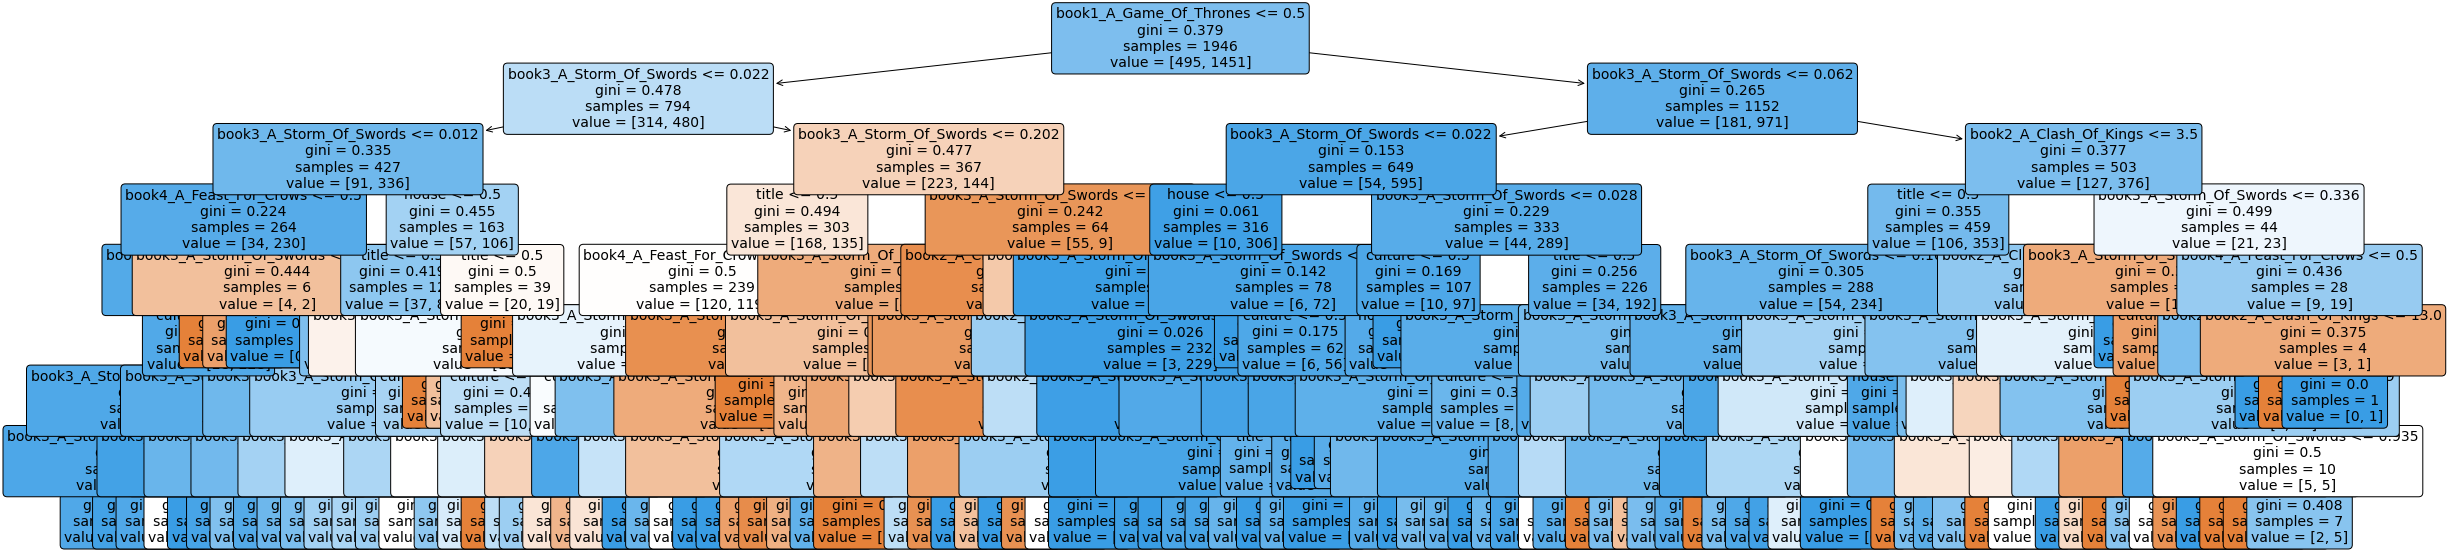

In [60]:
# setting figure size - plot the tree graphically
plt.figure(figsize=(40, 10))


# developing a plotted tree
plot_tree(decision_tree = tree_tuned_fit, 
          feature_names = Got.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

# Ensemble Modeling

In [61]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance.png')

In [62]:
# train/test split with the logit_sig variables
Got_data   =  Got.loc[ : , candidate_dict['logit_sig_2']]
Got_target =  Got.loc[ : , 'isAlive']

# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            Got_data,
            Got_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = Got_target)

In [63]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = 4,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [64]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.7864
Testing  ACCURACY: 0.8
AUC Score        : 0.6166


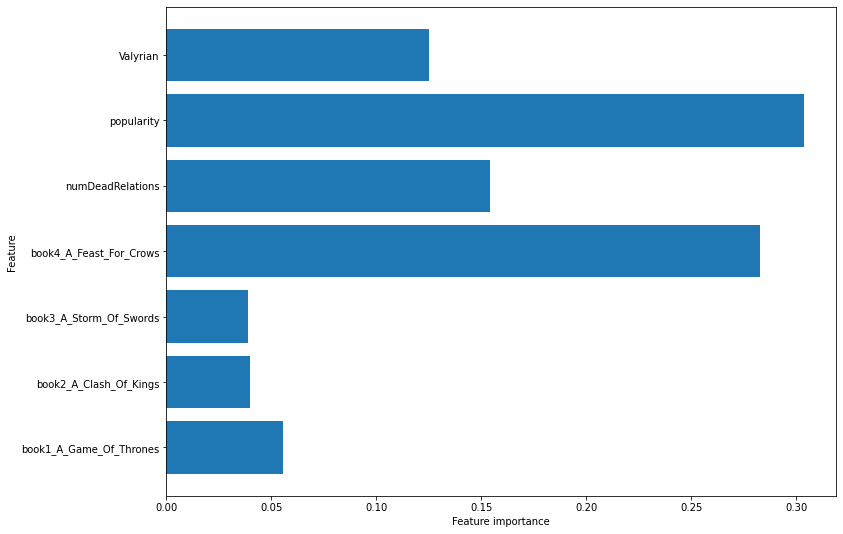

In [65]:
# plotting feature importances
plot_feature_importances(rf_default_fit, x_train,)

In [66]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 12
False Positives: 38
False Negatives: 1
True Positives : 144



In [67]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0              Logistic     0.6731             0.7727            0.8256   (18, 32, 2, 143)
1             Full Tree     0.6334             0.8812            0.7179   (18, 32, 2, 143)
2           Pruned Tree     0.6666             0.7818            0.8256   (18, 32, 2, 143)
3              Tuned LR     0.6697             0.7738            0.8205   (18, 32, 3, 142)
4            Tuned Tree     0.8186             0.8355            0.8667  (36, 14, 12, 133)
5  Random Forest (Full)     0.6166             0.7864            0.8000   (12, 38, 1, 144)

In [68]:
# FITTING the training data
#rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
#rf_default_fit_pred = rf_default_fit.predict(x_test)


# declaring a hyperparameter space
#estimator_range  = np.arange(100, 1100, 250)
#leaf_range       = np.arange(1, 31, 10)
#criterion_range  = ['gini', 'entropy']
#bootstrap_range  = [True, False]
#warm_start_range = [True, False]


# creating a hyperparameter grid
#param_grid = {'n_estimators'     : estimator_range,
#              'min_samples_leaf' : leaf_range,
#              'criterion'        : criterion_range,
#              'bootstrap'        : bootstrap_range,
#              'warm_start'       : warm_start_range}


# INSTANTIATING the model object without hyperparameters
#forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
#forest_cv = RandomizedSearchCV(estimator           = forest_grid,
#                               param_distributions = param_grid,
#                               cv         = 3,
#                               n_iter     = 1000,
#                               scoring    = make_scorer(roc_auc_score,
#                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#forest_cv.fit(Got_data, Got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", forest_cv.best_params_)
#print("Tuned Training AUC:", forest_cv.best_score_.round(4))

In [69]:
# best estimators based on RandomizedSearchCV
#forest_cv.best_estimator_

In [70]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion='entropy', 
                                      min_samples_leaf=1,
                                      n_estimators=100, 
                                      random_state=219,
                                      bootstrap=False,
                                      warm_start=True)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(Got_data, Got_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.8772
Forest Tuned Testing  ACCURACY: 0.9231
Forest Tuned AUC Score        : 0.8959


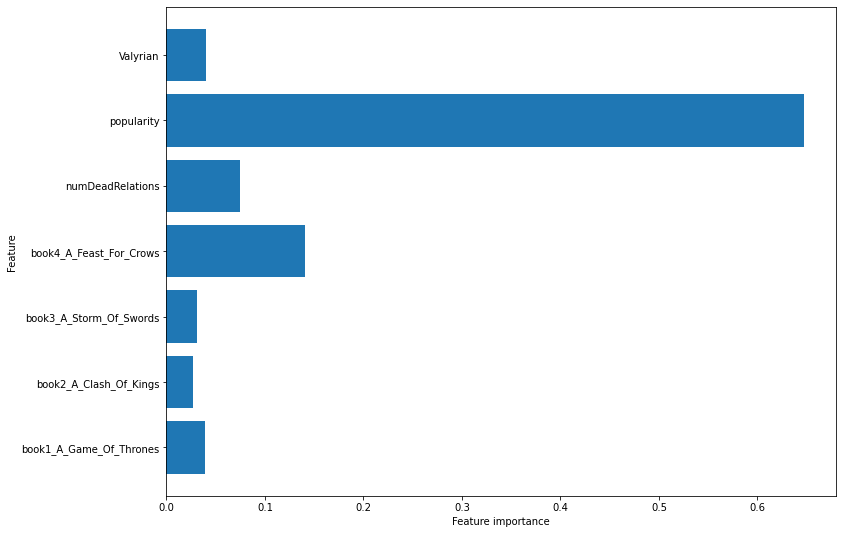

In [71]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [72]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 42
False Positives: 8
False Negatives: 7
True Positives : 138



In [73]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest (Full) - FINAL MODEL',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0                                  Logistic     0.6731             0.7727            0.8256   (18, 32, 2, 143)
1                                 Full Tree     0.6334             0.8812            0.7179   (18, 32, 2, 143)
2                               Pruned Tree     0.6666             0.7818            0.8256   (18, 32, 2, 143)
3                                  Tuned LR     0.6697             0.7738            0.8205   (18, 32, 3, 142)
4                                Tuned Tree     0.8186             0.8355            0.8667  (36, 14, 12, 133)
5                      Random Forest (Full)     0.6166             0.7864            0.8000   (12, 38, 1, 144)
6  Tuned Random Forest (Full) - FINAL MODEL     0.8959             0.8772            0.9231    (42, 8, 7, 138)

# Gradient Boosted Machines


In [74]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.823
Testing ACCURACY : 0.8564
AUC Score        : 0.7462


In [75]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 42
False Positives: 8
False Negatives: 7
True Positives : 138



In [76]:
# SCORING the model
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc ,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0                                  Logistic     0.6731             0.7727            0.8256   (18, 32, 2, 143)
1                                 Full Tree     0.6334             0.8812            0.7179   (18, 32, 2, 143)
2                               Pruned Tree     0.6666             0.7818            0.8256   (18, 32, 2, 143)
3                                  Tuned LR     0.6697             0.7738            0.8205   (18, 32, 3, 142)
4                                Tuned Tree     0.8186             0.8355            0.8667  (36, 14, 12, 133)
5                      Random Forest (Full)     0.6166             0.7864            0.8000   (12, 38, 1, 144)
6  Tuned Random Forest (Full) - FINAL MODEL     0.8959             0.8772            0.9231    (42, 8, 7, 138)
7                                GBM (Full)     0.6166             0.8230            0.8564    (42, 8, 7, 138)

In [77]:
# declaring a hyperparameter space
#learn_range        = np.arange(0.1, 2.2, 0.5)
#estimator_range    = np.arange(100, 501, 25)
#depth_range        = np.arange(2, 11, 2)
#warm_start_range   = [True, False]

# creating a hyperparameter grid
#param_grid = {'learning_rate' : learn_range,
#              'max_depth'     : depth_range,
#              'n_estimators'  : estimator_range,
#              'warm_start'    : warm_start_range}


# INSTANTIATING the model object without hyperparameters
#full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
#full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
#                           param_distributions = param_grid,
#                           cv                  = 3,
#                           n_iter              = 500,
#                           random_state        = 219,
#                           scoring             = make_scorer(roc_auc_score,
#                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#full_gbm_cv.fit(Got_data, Got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", full_gbm_cv.best_params_)
#print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

In [78]:
# INSTANTIATING with best_estimator
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.1,
                                       max_depth     = 2,
                                       n_estimators  = 100,
                                       warm_start    = False,
                                       random_state  = 219)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(Got_data, Got_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.799
Testing  ACCURACY: 0.8769
AUC Score        : 0.7862


In [79]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 30
False Positives: 20
False Negatives: 4
True Positives : 141



In [80]:
# declaring model performance objects
gbm_train_acc = gbm_tuned_fit.score(x_train, y_train).round(4)
gbm_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned GBM',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Score'          : gbm_auc,
                          'Confusion Matrix'   : (gbm_tuned_tn,
                                                  gbm_tuned_fp,
                                                  gbm_tuned_fn,
                                                  gbm_tuned_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0                                  Logistic     0.6731             0.7727            0.8256   (18, 32, 2, 143)
1                                 Full Tree     0.6334             0.8812            0.7179   (18, 32, 2, 143)
2                               Pruned Tree     0.6666             0.7818            0.8256   (18, 32, 2, 143)
3                                  Tuned LR     0.6697             0.7738            0.8205   (18, 32, 3, 142)
4                                Tuned Tree     0.8186             0.8355            0.8667  (36, 14, 12, 133)
5                      Random Forest (Full)     0.6166             0.7864            0.8000   (12, 38, 1, 144)
6  Tuned Random Forest (Full) - FINAL MODEL     0.8959             0.8772            0.9231    (42, 8, 7, 138)
7                                GBM (Full)     0.6166             0.8230            0.8564    (42, 8, 7, 138)
8                                 Tuned GBM     0.7862             0.7990            0.8769   (30, 20, 4, 141)